# Data Preparation

## Preparation of the Environment

### Import libraries

In [19]:
import sys
sys.path.append("..")

In [21]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicorn_analysis.utils.data_preparation_func as functions

### Define styles

In [22]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

### Load data

In [23]:
df = pd.read_excel(os.path.join(os.getcwd(), os.pardir, 'data', 'external', 'unicorns_companies.xlsx'), engine='openpyxl')
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


## Cleaning of the Data Set

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


### Modification of Values

In [25]:
df['Valuation'].unique()

array(['$180B', '$100B', '$95B', '$46B', '$40B', '$39B', '$38B', '$33B',
       '$32B', '$27B', '$25B', '$22B', '$20B', '$18B', '$17B', '$15B',
       '$14B', '$13B', '$12B', '$11B', '$10B', '$9B', '$8B', '$7B', '$6B',
       '$5B', '$4B', '$3B', '$2B', '$1B'], dtype=object)

In [26]:
df['Funding'].unique()

array(['$8B', '$7B', '$2B', '$4B', '$572M', '$3B', '$14B', '$5B', '$918M',
       '$476M', '$770M', '$979M', '$721M', '$490M', '$734M', '$427M',
       '$400M', '$1B', '$799M', '$765M', '$800M', '$376M', '$558M',
       '$294M', '$564M', '$333M', '$691M', '$343M', '$497M', '$71M',
       '$679M', '$775M', '$105M', '$742M', '$607M', '$549M', '$660M',
       '$820M', '$297M', '$922M', '$863M', '$447M', '$844M', '$603M',
       '$583M', '$912M', '$920M', '$849M', '$424M', '$645M', '$802M',
       '$629M', '$448M', '$928M', '$815M', '$728M', '$433M', '$891M',
       '$524M', '$803M', '$415M', '$587M', '$826M', '$910M', '$412M',
       '$405M', '$729M', '$600M', '$869M', '$187M', '$943M', '$514M',
       '$492M', '$644M', '$562M', '$286M', '$559M', '$647M', '$567M',
       '$428M', '$996M', '$596M', '$426M', '$462M', '$824M', '$926M',
       '$755M', '$633M', '$599M', '$371M', '$425M', '$761M', '$903M',
       '$704M', '$503M', '$655M', '$263M', '$216M', '$128M', '$776M',
       '$119M', '$

In [27]:
df['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

In [29]:
df_without_foreign_characters = df.copy()
df_without_foreign_characters['Valuation'] = functions.remove_foreign_characters(df_without_foreign_characters['Valuation'])
df_without_foreign_characters['Funding'] = functions.remove_foreign_characters(df_without_foreign_characters['Funding'])
df_without_foreign_characters['Funding'] = functions.change_value(df_without_foreign_characters['Funding'], 'nknow')
df_without_foreign_characters['Industry'] = functions.correcting_AI(df_without_foreign_characters['Industry'])
df_without_foreign_characters

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,379,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,990,"58.com, Tencent Holdings"
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,80,"Xingwang Investment Management, China Capital ..."
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,792,"IAG Capital Partners, Augmentum Fintech, North..."


### Modification of Data Types

In [30]:
df_without_foreign_characters.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [31]:
df_dtype_changed = df_without_foreign_characters.copy()
df_dtype_changed= df_dtype_changed.astype({
    'Valuation': 'int32',
    'Industry': 'category',
    'Year Founded': 'int32',
    'Continent': 'category',
    'Funding': 'float32'
})
df_dtype_changed.dtypes

Company                     object
Valuation                    int32
Date Joined         datetime64[ns]
Industry                  category
City                        object
Country                     object
Continent                 category
Year Founded                 int32
Funding                    float32
Select Investors            object
dtype: object

**Modification of Values**

In [32]:
df_dtype_changed['Funding'] = functions.million_to_billion(df_dtype_changed['Funding'], df['Funding'])
df_dtype_changed

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,0.379,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,0.990,"58.com, Tencent Holdings"
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,0.080,"Xingwang Investment Management, China Capital ..."
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,0.792,"IAG Capital Partners, Augmentum Fintech, North..."


### Handle Missing Values

In [33]:
(
    df_dtype_changed
    .isnull()
    .any()
)

Company             False
Valuation           False
Date Joined         False
Industry            False
City                 True
Country             False
Continent           False
Year Founded        False
Funding              True
Select Investors     True
dtype: bool

In [34]:
(
    df_dtype_changed
    .isnull()
    .sum()
)

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding             12
Select Investors     1
dtype: int64

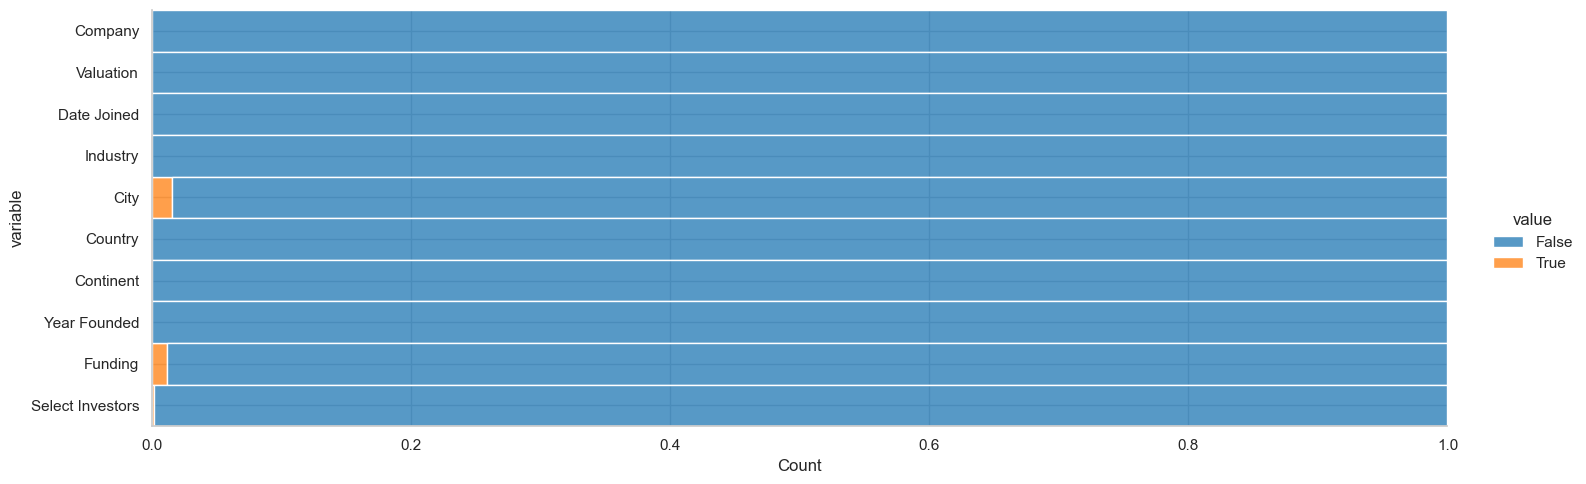

In [35]:
(
    df_dtype_changed
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data= df,
                y= 'variable',
                hue= 'value',
                multiple= 'fill',
                aspect= 3
            )
        )
    )
)

plt.show()

In [36]:
df_prepared = df_dtype_changed.copy()
df_prepared = df_prepared.dropna()
df_prepared.isnull().any()

Company             False
Valuation           False
Date Joined         False
Industry            False
City                False
Country             False
Continent           False
Year Founded        False
Funding             False
Select Investors    False
dtype: bool

## Data Frame to CSV File

In [38]:
df_prepared

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,0.379,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,0.990,"58.com, Tencent Holdings"
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,0.080,"Xingwang Investment Management, China Capital ..."
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,0.792,"IAG Capital Partners, Augmentum Fintech, North..."


In [39]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1045 non-null   object        
 1   Valuation         1045 non-null   int32         
 2   Date Joined       1045 non-null   datetime64[ns]
 3   Industry          1045 non-null   category      
 4   City              1045 non-null   object        
 5   Country           1045 non-null   object        
 6   Continent         1045 non-null   category      
 7   Year Founded      1045 non-null   int32         
 8   Funding           1045 non-null   float64       
 9   Select Investors  1045 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 68.2+ KB


In [40]:
df_prepared.to_csv(
    os.path.join(os.getcwd(), os.pardir, 'data', 'processed', 'unicorn_companies_prepared.csv'), 
    index=None, 
    header=True, 
    encoding='utf-8-sig'
)